In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic functionality on a graph

After importing a Raphtory graph we can create a blank one to work with


In [5]:
from raphtory import Graph
g = Graph() 
help(g)

Help on Graph in module builtins object:

class Graph(object)
 |  Methods defined here:
 |  
 |  add_edge(self, /, timestamp, src, dst, properties=Ellipsis)
 |  
 |  add_vertex(self, /, timestamp, id, properties=Ellipsis)
 |  
 |  at(self, /, end)
 |  
 |  earliest_time(self, /)
 |  
 |  has_edge(self, /, src, dst)
 |  
 |  has_vertex(self, /, v)
 |  
 |  latest(self, /)
 |  
 |  latest_time(self, /)
 |  
 |  num_edges(self, /)
 |  
 |  num_vertices(self, /)
 |  
 |  save_to_file(self, /, path)
 |  
 |  through(self, /, perspectives)
 |  
 |  window(self, /, t_start, t_end)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  load_from_file(path)



Once we have a new graph we can add vertices and edges to it via `add_vertex()` and `add_edge()`. For these:
* All additions into the graph must happen at a specific time - this means updates are also additions
* Additions can be completed out of order, making it very easy to merge datasets together
* The ids of vertices and the source/destination of an edge can be either strings or integers
* If you add an edge between vertices which do no exist in the graph yet, these will be automatically created
* Properties can be added onto vertices and edges - this is a dict of any value, but the keys must be strings

We can then check the state of the graph:
* To see if a vertex or edge exists you can use `has_vertex()` and `has_edge()`
* To get the earliest and latest times at which updates have been applied to the graph you can use `earliest_time()` and `latest_time()` - if not updates have been applied these will return `None`

In [6]:
# Basic Addition with integer IDs
g.add_vertex(timestamp=1,id=10)
g.add_edge(timestamp=2,src=1,dst=2)

print(g.has_vertex(10))
print(g.has_edge(1,2))


g.add_vertex(timestamp=5,id="Ben")
g.add_edge(timestamp=6,src="Ben",dst="Haaroon")
g.add_edge(timestamp=8,src="Hamza",dst="Ben")

g.add_edge(timestamp=7,src="Haaroon",dst="Hamza",properties= {"property1": 1, "property2": 9.8, "property3": "test"})

g.add_vertex(timestamp=5,id="Ben")


g.add_vertex(timestamp=5,id="Hamza",properties= {"property1": 5, "property2": 12.5, "property3": "test2"})




True
True


<Axes: xlabel='degree', ylabel='Count'>

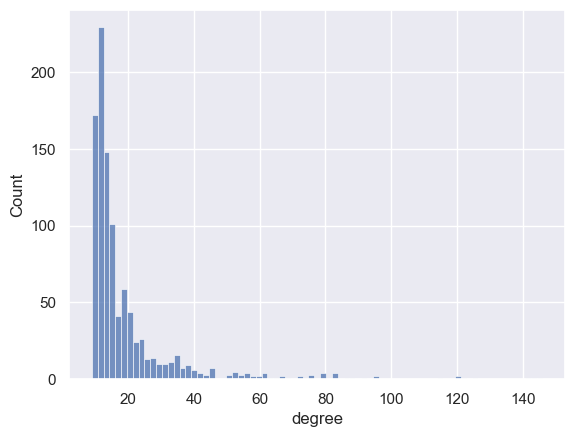

In [ ]:
from raphtory import graph_gen

g = Graph(4)
graph_gen.ba_preferential_attachment(g,vertices_to_add=1000,edges_per_step=10)
view = g.window(0,1000)

ids = []
degrees = []
for v in view.vertices():
    ids.append(v.id)
    degrees.append(v.degree())

df = pd.DataFrame.from_dict({"id":ids,"degree": degrees})

sns.set()
sns.histplot(df.degree)

In [ ]:
from raphtory import graph_loader

g = graph_loader.lotr_graph()
view = g.window(1000,100000)

print(view.earliest_time())
print(view.latest_time())
print(g.earliest_time())
print(g.latest_time())

1000
32674
33
32674


In [ ]:
from raphtory import Graph
from raphtory import algorithms
from raphtory import Perspective

g = graph_loader.lotr_graph()
views = g.through(Perspective.rolling(1000))

for view in views:
    print(next(view.edges()).src)
    print(view.num_edges(),view.num_vertices())


13840129630991083248
20 23
13840129630991083248
44 21
13840129630991083248
20 9
13840129630991083248
16 9
12772980705568717046
17 11
12772980705568717046
45 21
13840129630991083248
44 29
13840129630991083248
84 37
13840129630991083248
68 26
13840129630991083248
41 19
13840129630991083248
38 19
13840129630991083248
49 19
13840129630991083248
38 22
13840129630991083248
28 18
13840129630991083248
5 7
13840129630991083248
19 14
13840129630991083248
18 13
13840129630991083248
24 13
13840129630991083248
20 14
13840129630991083248
17 14
12772980705568717046
5 5
13840129630991083248
15 11
12772980705568717046
30 14
13840129630991083248
22 10
12772980705568717046
13 10
13840129630991083248
48 26
13840129630991083248
86 33
13840129630991083248
48 30
13840129630991083248
134 39
12772980705568717046
22 16
13840129630991083248
78 28
13840129630991083248
214 49
13840129630991083248
38 17
